In [1]:

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset

url = r"C:\Users\masud\OneDrive - students.boku.ac.at\Becode\Project\SteelComp\CoilData.csv"

#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = read_csv(url)

In [3]:
# shape
print(dataset.shape)

(57094, 24)


In [4]:
# head
print(dataset.head(20))

      coil  furnace Number analyse  Hardness_1  Hardness_2   Width  \
0   396378               1   K371        10003         101  1302.1   
1   396376               3   K371        10123         101  1282.3   
2   396377               4   K321        10040         102  1297.4   
3   396379               3   K371        10243         102  1295.2   
4   396380               4   K321        10012         100  1293.3   
5   396381               3   KB38        11123         111  1292.4   
6   396382               1   K321        10041         100  1296.0   
7   396383               4   K211         9947          99  1295.3   
8   396384               3   K211         9925          99  1327.2   
9   396385               1   K371        10004         100  1342.5   
10  396386               4   K211         9917          99  1341.5   
11  396387               3   K321         9969         100  1344.9   
12  396388               1   K111         9876          99  1340.7   
13  396389          

In [5]:
# descriptions
print(dataset.describe())

                coil  furnace Number    Hardness_1    Hardness_2  \
count   57094.000000    57094.000000  57094.000000  57094.000000   
mean   421911.707255        2.362157  11164.320349    110.903072   
std    137589.898062        1.280530   1346.841817     16.738803   
min     10001.000000        1.000000      0.000000      0.000000   
25%    420475.250000        1.000000  10116.000000     99.000000   
50%    454999.500000        3.000000  10504.000000    104.000000   
75%    492857.750000        4.000000  12147.000000    123.000000   
max    533505.000000        4.000000  17362.000000    168.000000   

              Width  Temperature before finishing mill  \
count  57094.000000                       57094.000000   
mean    1260.063262                        1165.911076   
std      290.336376                          78.302204   
min        0.000000                           0.000000   
25%     1093.025000                        1155.000000   
50%     1269.750000                    

In [6]:
dataset.columns

Index(['coil', 'furnace Number', 'analyse', 'Hardness_1', 'Hardness_2',
       'Width', 'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'Thickness profile',
       'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va',
       'mo'],
      dtype='object')

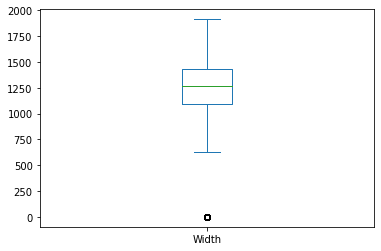

In [7]:

dataset["Width"].plot(kind='box')
plt.show()

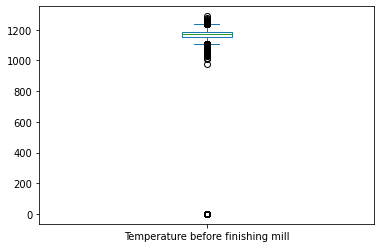

In [8]:
dataset["Temperature before finishing mill"].plot(kind='box')
plt.show()

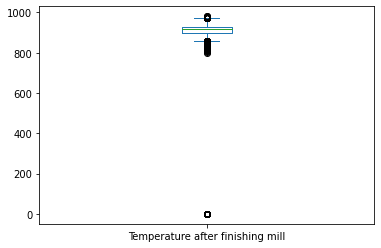

In [9]:
dataset["Temperature after finishing mill"].plot(kind='box')
plt.show()

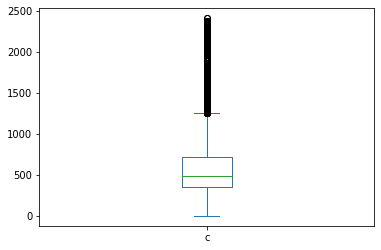

In [10]:
dataset["c"].plot(kind='box')
plt.show()

<AxesSubplot:>

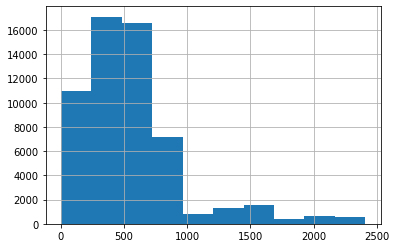

In [11]:
dataset["c"].hist()


<AxesSubplot:>

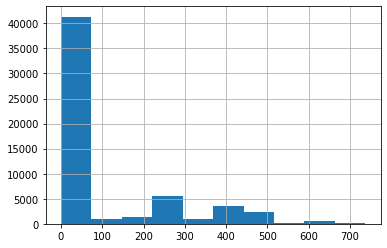

In [12]:
dataset["nb"].hist()

<AxesSubplot:>

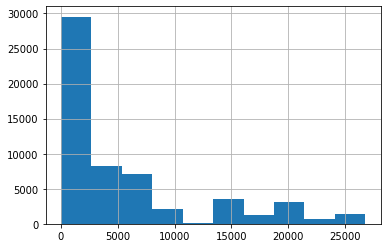

In [13]:
dataset["mn"].hist()

<AxesSubplot:>

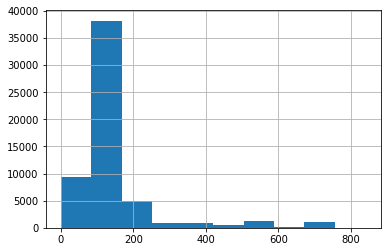

In [14]:
dataset["p"].hist()

<AxesSubplot:>

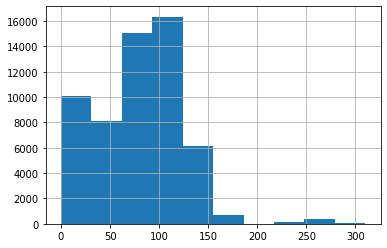

In [15]:
dataset["s"].hist()

<AxesSubplot:>

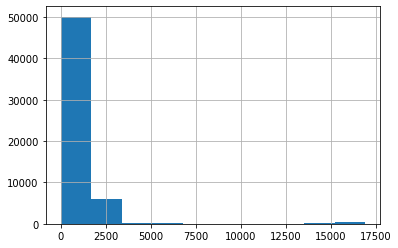

In [16]:
dataset["si"].hist()

<AxesSubplot:>

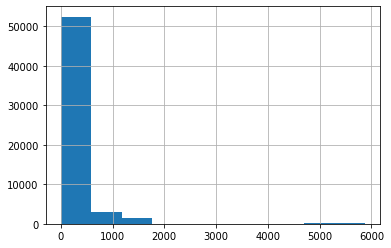

In [17]:
dataset["ma"].hist()

<AxesSubplot:>

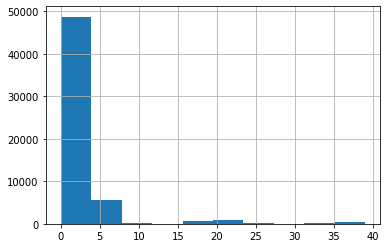

In [18]:
dataset["b"].hist()

<AxesSubplot:>

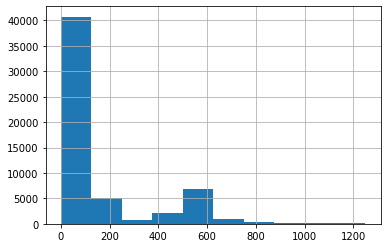

In [19]:
dataset["ti"].hist()

<AxesSubplot:>

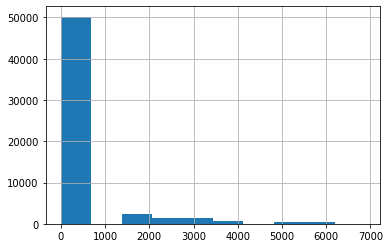

In [20]:
dataset["cr"].hist()

<AxesSubplot:>

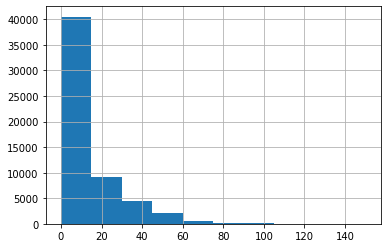

In [21]:
dataset["va"].hist()

<AxesSubplot:>

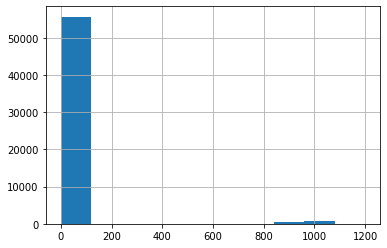

In [22]:
dataset["mo"].hist()

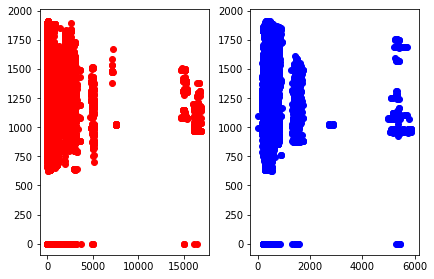

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset['si'],dataset['Width'], color= "r")
axes[1].scatter(dataset['ma'],dataset['Width'], color= "b")
plt.show()

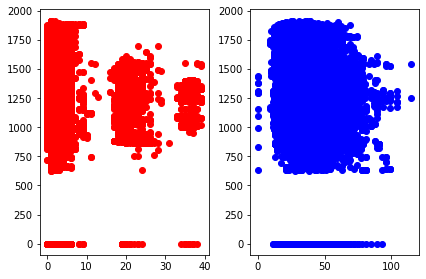

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset['b'],dataset['Width'], color= "r")
axes[1].scatter(dataset['n'],dataset['Width'], color= "b")

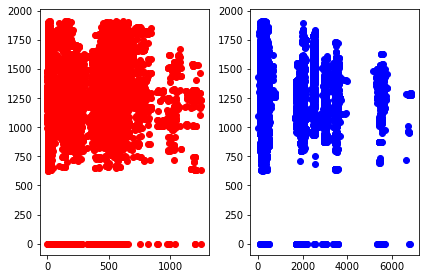

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset['ti'],dataset['Width'], color= "r")
axes[1].scatter(dataset['cr'],dataset['Width'], color= "b")

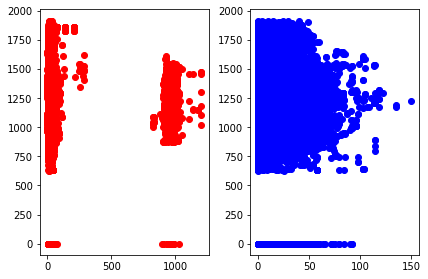

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset['mo'],dataset['Width'], color= "r")
axes[1].scatter(dataset['va'],dataset['Width'], color= "b")

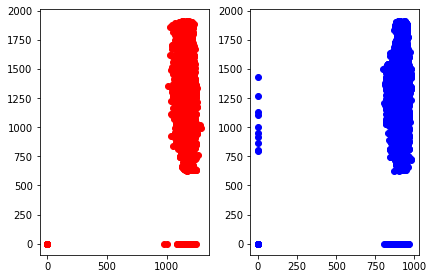

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset["Temperature before finishing mill"],dataset['Width'], color= "r")
axes[1].scatter(dataset["Temperature after finishing mill"],dataset['Width'], color= "b")

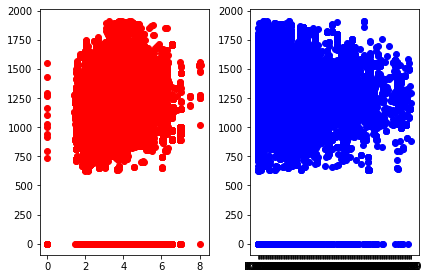

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(dataset["Thickness"],dataset['Width'], color= "r")
axes[1].scatter(dataset["analyse"],dataset['Width'], color= "b")

In [29]:
dataset.analyse

0        K371 
1        K371 
2        K321 
3        K371 
4        K321 
         ...  
57089    K371 
57090    K371 
57091    K371 
57092    K371 
57093    K371 
Name: analyse, Length: 57094, dtype: object

In [30]:
import pandas as pd
import glob
import os

In [31]:
files = os.path.join(r"C:\Users\masud\OneDrive - students.boku.ac.at\Becode\Project\SteelComp\signalDATA\SignalExport")

In [32]:
files = glob.glob(files)

In [33]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

ValueError: No objects to concatenate

In [ ]:
"""
import glob
import os
import pandas as pd

# the path to your csv file directory
mycsvdir = r"C:\Users\masud\OneDrive - students.boku.ac.at\Becode\Project\SteelComp\signalDATA\SignalExport"

# get all the csv files in that directory (assuming they have the extension .csv)
csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))

# loop through the files and read them in with pandas
dataframes = []  # a list to hold all the individual pandas DataFrames
for csvfile in csvfiles:
    df = pd.read_csv(csvfile)
    dataframes.append(df)

# concatenate them all together
result = pd.concat(dataframes, ignore_index=True)

# print out to a new csv file
result.to_csv('all.csv')

"""